In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = {
    'mesin': [1000,2000,3000,4000,5000,6000,7000],
    'harga': [10,25,35,55,80,88,96]
}
dataDF = pd.DataFrame(data1)
dataDF

,mesin,harga
0,1000,10
1,2000,25
2,3000,35
3,4000,55
4,5000,80
5,6000,88
6,7000,96


Text(0, 0.5, 'Harga (Juta Rupiah)')

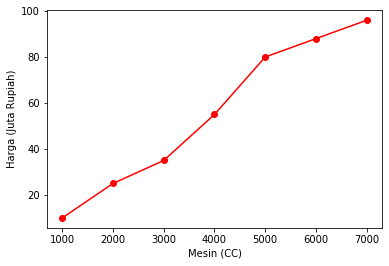

In [4]:
plt.plot(dataDF['mesin'], dataDF['harga'],'ro-')
plt.xlabel('Mesin (CC)')
plt.ylabel('Harga (Juta Rupiah)')

In [5]:
dataDF.corr()

,mesin,harga
mesin,1.000000,0.989162
harga,0.989162,1.000000


In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(dataDF[['mesin']],dataDF['harga'])

#gradient/ slope
print(model.coef_[0])
#pakai [0] biar arraynya hilang jadi num

#Intercept
print(model.intercept_)

0.015321428571428573
-5.714285714285722


In [7]:
print(model.predict([[10000]]))

[147.5]


In [8]:
hargaPredict = model.predict(dataDF[['mesin']])
hargaPredict

array([  9.60714286,  24.92857143,  40.25      ,  55.57142857,
        70.89285714,  86.21428571, 101.53571429])

In [9]:
dataDF['hargaPredict'] = model.predict(dataDF[['mesin']])
dataDF

,mesin,harga,hargaPredict
0,1000,10,9.607143
1,2000,25,24.928571
2,3000,35,40.250000
3,4000,55,55.571429
4,5000,80,70.892857
5,6000,88,86.214286
6,7000,96,101.535714


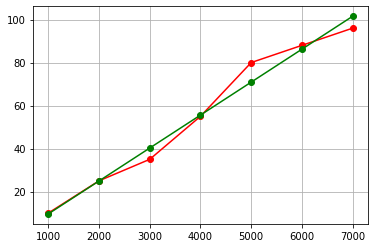

In [10]:
plt.grid(True)
plt.plot(dataDF['mesin'],dataDF['harga'],'ro-')
plt.plot(dataDF['mesin'],dataDF['hargaPredict'],'go-')

# Evaluation Metrics

In [11]:
from sklearn.metrics import max_error as me
me(dataDF['harga'], dataDF['hargaPredict'])

9.107142857142861

In [12]:
from sklearn.metrics import mean_absolute_error as mae
print("MAE:", 
        round(mae(dataDF['harga'], dataDF['hargaPredict']), 2))

MAE: 3.24


In [13]:
from sklearn.metrics import mean_squared_error as mse
print("MSE:",
        round(mse(dataDF['harga'], dataDF['hargaPredict']), 2))
print("RMSE:",
        round(np.sqrt(mse(dataDF['harga'], dataDF['hargaPredict'])), 2))

MSE: 20.69
RMSE: 4.55


In [14]:
from sklearn.metrics import median_absolute_error as medAE
print("medAE:",
        round(medAE(dataDF['harga'], dataDF['hargaPredict']), 2))

medAE: 1.79


In [15]:
from sklearn.metrics import mean_squared_log_error as msle
print("MSLE:",
        round(msle(dataDF['harga'], dataDF['hargaPredict']), 4))
print("RMSLE:",
        round(np.sqrt(msle(dataDF['harga'], dataDF['hargaPredict'])), 3))

MSLE: 0.0054
RMSLE: 0.073


In [16]:
from sklearn.metrics import r2_score
print("R2:",
        round(r2_score(dataDF['harga'], dataDF['hargaPredict']), 2))

R2: 0.98


# MANUAL

In [17]:
dataDF['xy'] = dataDF['mesin']*dataDF['harga']
dataDF['x^2'] = dataDF['mesin']**2
dataDF['y^2'] = dataDF['harga']**2

dataDF

,mesin,harga,hargaPredict,xy,x^2,y^2
0,1000,10,9.607143,10000,1000000,100
1,2000,25,24.928571,50000,4000000,625
2,3000,35,40.250000,105000,9000000,1225
3,4000,55,55.571429,220000,16000000,3025
4,5000,80,70.892857,400000,25000000,6400
5,6000,88,86.214286,528000,36000000,7744
6,7000,96,101.535714,672000,49000000,9216


Gradient/ Slope $\displaystyle m = \frac {n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2)-(\sum x)^2}$

In [1]:
m = ((dataDF['xy'].count()*dataDF['xy'].sum())-(dataDF['mesin'].sum()*dataDF['harga'].sum()))/(dataDF['x^2'].count() * dataDF['x^2'].sum() - (dataDF['mesin'].sum()**2))
m

NameError: name 'dataDF' is not defined

Intercept $\displaystyle c = \frac {(\sum y)(\sum x^2) - (\sum x)(\sum xy)} {n(\sum x^2) - (\sum x)^2}$ 

In [26]:
c = ((dataDF['harga'].sum() * dataDF['x^2'].sum()) - (dataDF['mesin'].sum() * dataDF['xy'].sum())) / (dataDF['x^2'].count() * dataDF['x^2'].sum() - (dataDF['mesin'].sum())**2) 
c

-5.714285714285714

Prediction $\displaystyle \hat{y} = mx + c$

In [32]:
yhat = m * dataDF['mesin'] + c
yhat

NameError: name 'm' is not defined

In [ ]:
yhat = m * dataDF['mesin'] + c
df['ŷ'] =  yhat
dataDF

In [ ]:
plt.plot(dataDF['mesin'], dataDF['harga']. 'ro-')